# Описание проекта 

*Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.*

**Подготовка данных**
- Замена названия столбцов (приведение к нижнему регистру);
- Преобразование данных в нужные типы;
- Обработка пропусков при необходимости:
- Подсчет суммарных продаж во всех регионах и запись их в отдельный столбец.

**Исследовательский анализ данных**

Исследовательский анализ данных в рамках проекта предполагает ответы на следующие вопросы:
- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Составьте портрет пользователя каждого региона**
- Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Проверка гипотез**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задать самостоятельно пороговое значение alpha.

**Пояснить:**
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.


**Общий вывод**

##  Подготовка данных

### Обзор данных, приведение заголовков столбцов к нижнему регистру

Откроем датасет и запросим общее описание данных и количество полных дубликатов.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/datasets/games.csv')

In [5]:
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [7]:
display(data.duplicated().sum())

0

In [9]:
display(data.duplicated(subset=['Name', 'Platform'], keep=False).sum())
display(data[data[['Name', 'Platform']].duplicated() == True])

10

In [111]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Датасет состоит из 16715 строк и 10 столбцов. Названия столбцов нуждаются в приведедении к нижнему регистру. Полные явные дубликаты отсутствуют, но имеются пропуски. Для столбцов Critic_Score, User_Score и Rating - количество пропусков значительное. В датасете присутствуют два типа данных float64 и object

In [112]:
data.columns = data.columns.str.lower()

Так же приведем к нижнему регистру столбцы содержащие текст и буквенные обозначения.

In [113]:
for column in data[['name','platform','genre','rating']]:
    data[column] = data[column].str.lower()
    

In [114]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Заголовки столбцов успешно приведены к нижнему регистру.

### Обработка пропусков, преобразование типов данных


Датасет содержит десять столбцов. Рассмотрим количество пропусков, наличие неявных дубликатов и типы данных в каждом из них. Подберем оптимальные способы обработки пропущенных значений и типы данных.

In [115]:
data['name'].describe()

count                           16713
unique                          11559
top       need for speed: most wanted
freq                               12
Name: name, dtype: object

In [116]:
data['name'].isna().sum()

2

In [117]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце *name* пропущены два значения, так же в строках отсутствуют данные об оценках и жанре. Год релиза 1993, поэтому для текущего исследования данные интереса на представляют. 

In [118]:
data = data[~data['name'].isna()]

In [119]:
data['year_of_release'].isna().sum()

269

In [120]:
year_of_release_filtered = data.query('year_of_release.isna()')
year_of_release_filtered_percent = (year_of_release_filtered.count() / data['year_of_release'].count())
display(year_of_release_filtered_percent['year_of_release']*100)

0.0

In [121]:
data.shape

(16713, 11)

Адекватно заполнить пропуски не представляется возможным, при этом количество пропусков относительно размера датасета является статистически не значительным, следовательно строки с пропущенным годом выпуска игры могут быть удалены.

In [122]:
data = data[~data['year_of_release'].isna()]

In [123]:
data.shape

(16444, 11)

In [124]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [125]:
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int64

Пропуски в столбце удалены, тип данных приведен к целочисленному.

Рассмотрим столбец с оценками критиков.

In [126]:
data.loc[data['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Из представленной таблицы можно увидеть, что у разных типов игр, вышедших в разное время и на разных платформах отстутсвуют не только оценки критиков, то так же и оценки пользователей, и возрастной рейтинг. Выведем так же конец списка, чтобы посмотреть не отличается ли ситуация и там.

In [127]:
data.loc[data['critic_score'].isna()].tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16704,plushees,ds,2008,simulation,0.01,0.00,0.00,0.0,NaN,tbd,e
16706,men in black ii: alien escape,gc,2003,shooter,0.01,0.00,0.00,0.0,NaN,tbd,t
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,woody woodpecker in crazy castle 5,gba,2002,platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Можно предположить, что на наличие или отсутствие оценок влияет платформа и год выхода игры, проверим, так ли это

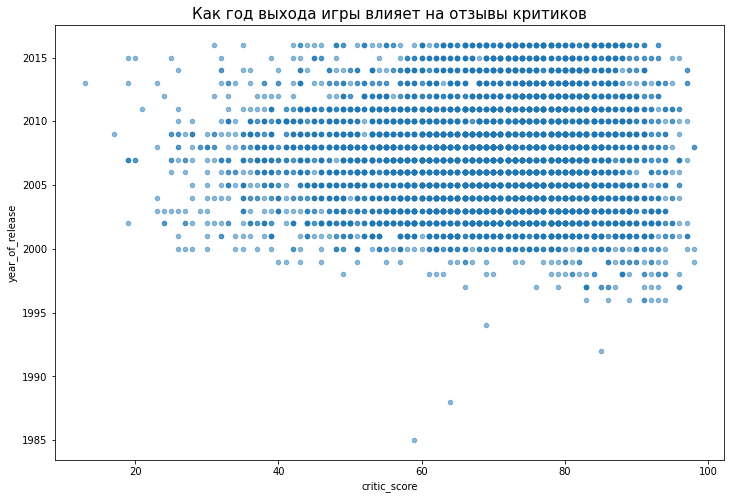

In [240]:
data.plot.scatter(figsize=(12,8),
    x='critic_score',
                         y='year_of_release',
                         alpha=0.5)
plt.title('Как год выхода игры влияет на отзывы критиков', fontsize=15)
plt.show()

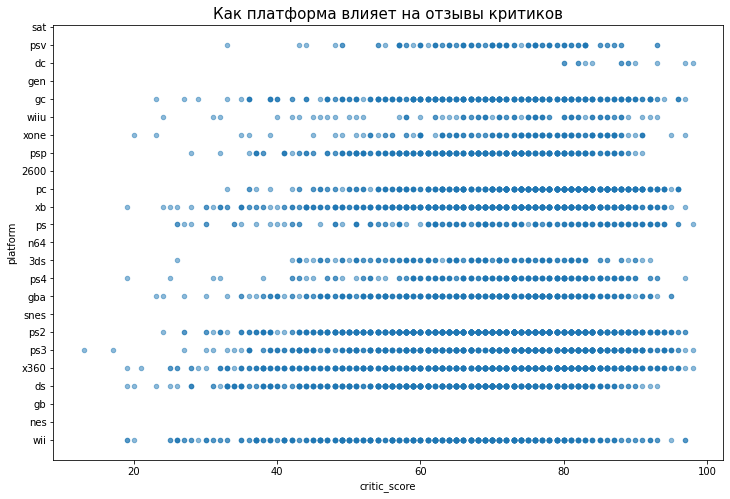

In [129]:
data.plot.scatter(figsize=(12,8),
    x='critic_score',
                         y='platform',
                         alpha=0.5)
plt.title('Как платформа влияет на отзывы критиков', fontsize=15)
plt.show()

По представленной визуализации можно обратить внимание на то, что для игр, выходивших 1985 по 1995 годы существует незначительное количество оценок, что можно связать с невозможностью в настоящее время с ними ознакомиться. Так же обращаем внимание на то, что есть платформы для которых нет оценок критиков, что так же может быть связано со временем и продолжительностью их жизни и невозможностью получить данные об оценках или свести их к формату рейтинга. На основании изложенного делаем вывод, что пропущенные данные, к сожалению, не подлежат ни восстановлению, ни удалению. Оставляем их без изменений. 

In [130]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце *user_score* нужно обратить внимание на аббревиатуру tbd, которая обозначет, что данные к моменту выгрузки не были обработаны. Соответственно заменить такое значение на числовое было бы некорректно, но и учитывать эти данные нельзя. Поэтому заменим все tbd на nan

In [131]:
data['user_score'].isna().sum()

6605

In [132]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

In [133]:
data['user_score'].isna().sum()

8981

Таким образом количество пропущенных значений увеличилось значительно, однако попробуем привести тип данных в столбце к числовому и посмотреть на распределение пропусков.

In [134]:
data['user_score'] = data['user_score'].astype(float)

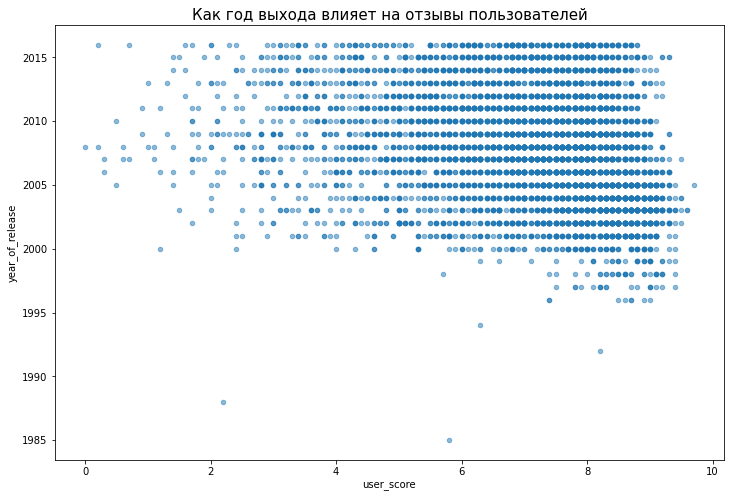

In [135]:
data.plot.scatter(figsize=(12,8),
    x='user_score',
                         y='year_of_release',
                         alpha=0.5)
plt.title('Как год выхода влияет на отзывы пользователей', fontsize=15)
plt.show()

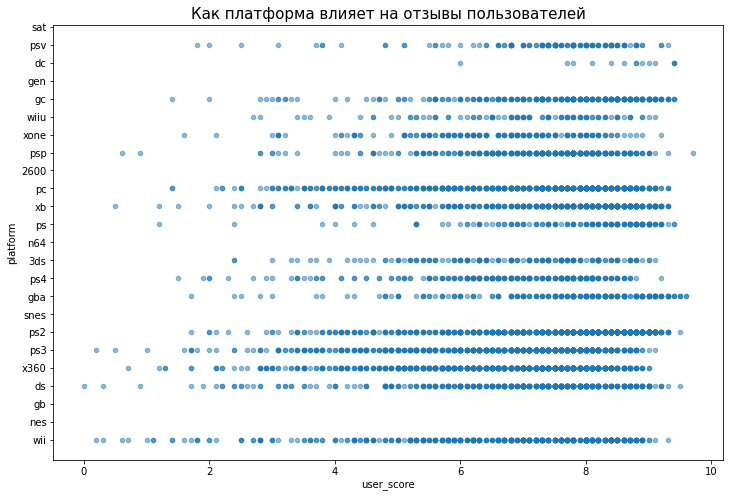

In [136]:
data.plot.scatter(figsize=(12,8),
    x='user_score',
                 y='platform',
                 alpha=0.5)
plt.title('Как платформа влияет на отзывы пользователей', fontsize=15)
plt.show()

Ситуация аналогична столбцу *critic_score*. Скорее всего большая часть пропусков вызвана отстуствием данных, так же мы знаем, что часть пропусков вызвана тем, что данные не были обработаны или занесены в датасет на момент выгрузки.

In [137]:
data['rating'].describe()

count     9768
unique       8
top          e
freq      3921
Name: rating, dtype: object

In [138]:
data.loc[data['rating'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [139]:
data.loc[data['rating'].isna()].tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16705,15 days,pc,2009,adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,woody woodpecker in crazy castle 5,gba,2002,platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


В пропусках столбца *rating* так же встречаются игры разных годов выпуска и вышедшие на разных платформах. Заполним пропуски значением-заглушкой и посмотрим на их распределение

In [140]:
data['rating'] = data['rating'].fillna('unknown')

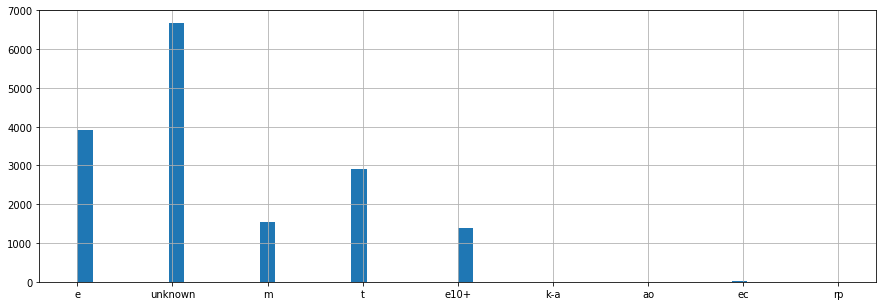

In [141]:
data['rating'].hist(bins=50, figsize=(15, 5))
plt.show()

In [142]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [143]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Дополнение данными

В соответствии с техническим заданием необходимо посчитать сумму всех продаж и сохранить ее в новом столбце.

In [145]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [146]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


### Вывод

Подготовка данных данных проведена, заголовки столбцов успешно приведены к нижнему регистру.
- Удалены пропуски в столбце *name*;
- Удалены пропуски в столбце *year_of_release*;
- Тип данных столбца *year_of_release* приведен к целочисленному;
- Тип данных столбца *user_score* приведен к числу с плавающей точкой;
- Пропуски в столбце *rating* были заменены на значение-заглушку;
- Пропуски в столбце *critic_score* были оставлены без обработки;
- Пропуски в столбце *user_score* были оставлены без обработки.

Основной причиной пропусков в данных считается отсутствие данных как таковых, связанное с тем, что большое количество игр и игровых платформ появились до возможности собирать, обрабатывать и хранить такую информацию.

- Продажи во всех регионах подсчитаны и записаны в отдельный столбец.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [147]:
games_per_year = pd.pivot_table(data, values='name', index='year_of_release', aggfunc='count')

In [148]:
display(data.duplicated(subset=['year_of_release', 'name']).sum())
display(data[data[['year_of_release', 'name']].duplicated() == True])

4249

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
35,call of duty: black ops ii,x360,2012,shooter,8.25,4.24,0.07,1.12,83.0,4.8,m,13.68
37,call of duty: modern warfare 3,ps3,2011,shooter,5.54,5.73,0.49,1.57,88.0,3.2,m,13.33
41,call of duty: black ops,ps3,2010,shooter,5.99,4.37,0.48,1.79,88.0,6.4,m,12.63
55,call of duty: modern warfare 2,ps3,2009,shooter,4.99,3.64,0.38,1.60,94.0,6.3,m,10.61
...,...,...,...,...,...,...,...,...,...,...,...,...
16692,metal gear solid v: ground zeroes,pc,2014,action,0.00,0.01,0.00,0.00,80.0,7.6,m,0.01
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [149]:
display(games_per_year.head())

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


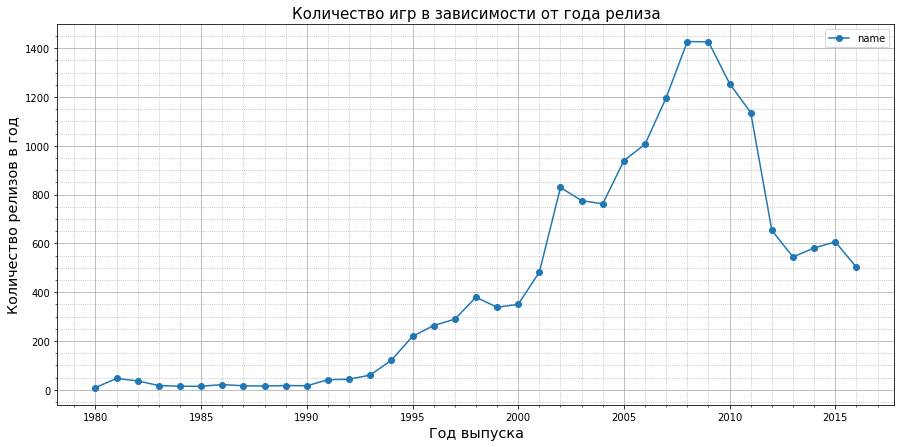

In [150]:
games_per_year.plot(y='name',style='o-', figsize=(15, 7))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.title('Количество игр в зависимости от года релиза', fontsize=15)
plt.ylabel('Количество релизов в год', fontsize='x-large')
plt.xlabel('Год выпуска', fontsize='x-large')
plt.show()

В разные годы выпускалось от нуля до полутора тысяч игр в год. Количество релизов в год начинает расти с 2000 года с пиком в 2008-2009 годах. Поскольку мы хотим построить прогноз следующего года, а данные с 1980 по 2000 год скорее всего несколько морально устарели, то "хвост" слева можно считать неважным. Таким образом у нас остается "колокол", напоминающий нормальное распределение, включающий в себя количество релизов за период с 2001 по 2016 гг. 

### Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [151]:
sales_by_platform = (pd.pivot_table(
    data, 
    values='world_sales', 
    index='platform', 
    aggfunc='sum').sort_values(by='world_sales', ascending=False))

In [152]:
display(sales_by_platform.head(10))

,world_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


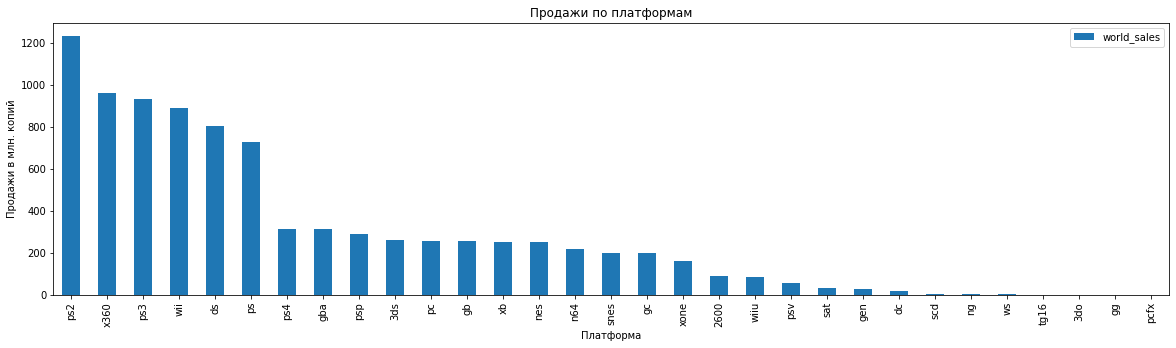

In [153]:
sales_by_platform.plot(kind='bar', figsize=(20,5))
plt.title('Продажи по платформам')
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Платформа')
plt.show()

Выберем топ-10 платформ с самыми высокими продажами.

In [154]:
platforms_top = sales_by_platform.sort_values(by='world_sales', ascending=False)[0:10].index
display(platforms_top)

Index(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds'], dtype='object', name='platform')

In [155]:
data_top_platforms = data.query('platform in @platforms_top')
display(data_top_platforms.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown,24.67
11,mario kart ds,ds,2005,racing,9.71,7.47,4.13,1.90,91.0,8.6,e,23.21
13,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,80.0,7.7,e,22.70
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,6.3,e,21.82


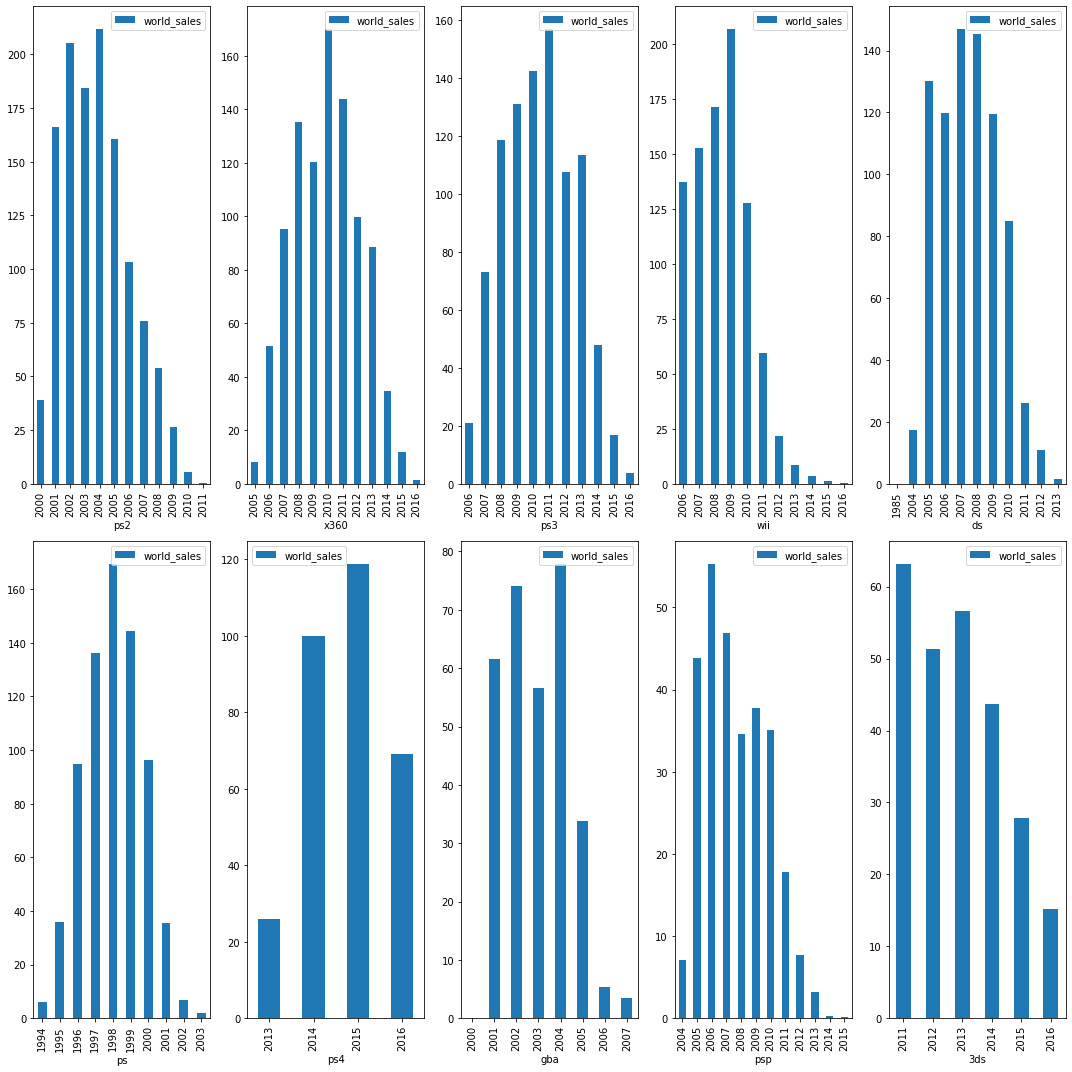

In [156]:
def platforms_top_sales(data, some_list, n, m, ysize):
    top_filtered = data.pivot_table(index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
    plt.subplots(n,m,figsize=(15,ysize))
    i = 1
    for platform in some_list:
        ax = plt.subplot(n,m,i)
        l = list(top_filtered.query('platform==@platform').index.get_level_values(1))
        top_filtered.query('platform==@platform').plot(kind='bar', ax=ax, label=platform)
        plt.legend()
        plt.xlabel(platform)
        i+=1
        ax.set_xticklabels(l)
    plt.tight_layout()
platforms_top_sales(data_top_platforms, platforms_top, 2, 5, 15)

По представленным графикам мы можем сделать вывод, что характерный срок за который появляются новые и исчезают старые платформы это 6-7 лет, при этом средний срок популярности платформы около десяти лет, с пиком продаж приходящимся на 3-5 годы.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

В качесте актуального периода возьмем данные за последние пять лет, с 2011 года, когда количество ежегодных релизов игр уже значительно снизилось.

In [157]:
data_actual = data.query('year_of_release >= 2014')
display(data_actual)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [158]:
data_actual_platforms = data_actual.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='world_sales', 
    aggfunc='sum',
fill_value = 0)

In [159]:
display(data_actual_platforms)

platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


В текущих данных пропуски заполним на 0, так как исходя из сроков появления релизов на платформах можно предположить, что в данном случае пропуски обусловлены отстутствием продаж в указанном году.

In [184]:
data_actual_platforms

platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


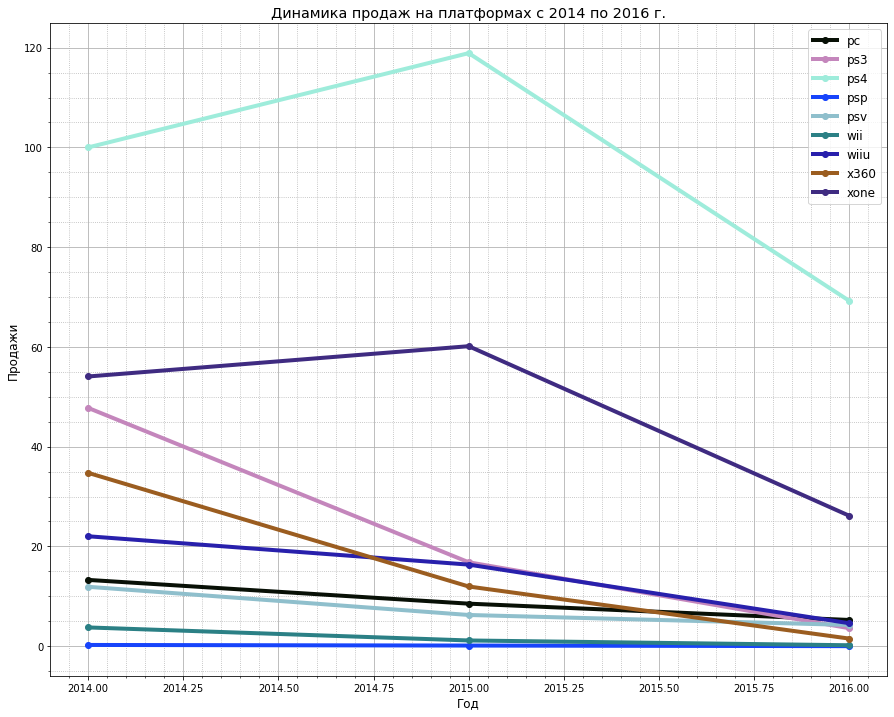

In [241]:
f, ax = plt.subplots(figsize=(15, 12))
for platform in data_actual_platforms.columns[1:]:
    data_actual_platforms.plot(label=platform,
                         y=platform,
                         marker='o', 
                         linewidth=4,
                         c=np.random.rand(3,), 
                         ax=ax)
plt.legend(loc='upper right', fontsize = 'large')
plt.title(f'Динамика продаж на платформах с 2014 по 2016 г.', fontsize = 'x-large')
plt.ylabel('Продажи', fontsize = 'large')
plt.xlabel('Год', fontsize = 'large')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

plt.show()

По графику мы можем определить, что по состоянию на 2016 год в продажах лидируют платформы ps4, xone, wiiu и pc. Исходя из наблюдей, сделанных по предыдущим графикам можно ожидать рост платформ ps4, xone в следующем году. Платформы x360 и ps3 теряют свои позиции. В текущий момент растущих линий на графике незамечается.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Для построения графика "ящик с усами" рассмотрим топ-10 самых продаваемых игр за выбранный период.

In [186]:
top_games_actual = data_actual.groupby('name')['world_sales'].sum().sort_values(ascending=False)[0:10]
display(top_games_actual)

name
call of duty: black ops 3              25.67
call of duty: advanced warfare         21.97
grand theft auto v                     19.26
fifa 15                                17.37
fifa 16                                16.30
minecraft                              14.98
fallout 4                              12.67
destiny                                12.54
super smash bros. for wii u and 3ds    12.42
star wars battlefront (2015)           12.19
Name: world_sales, dtype: float64

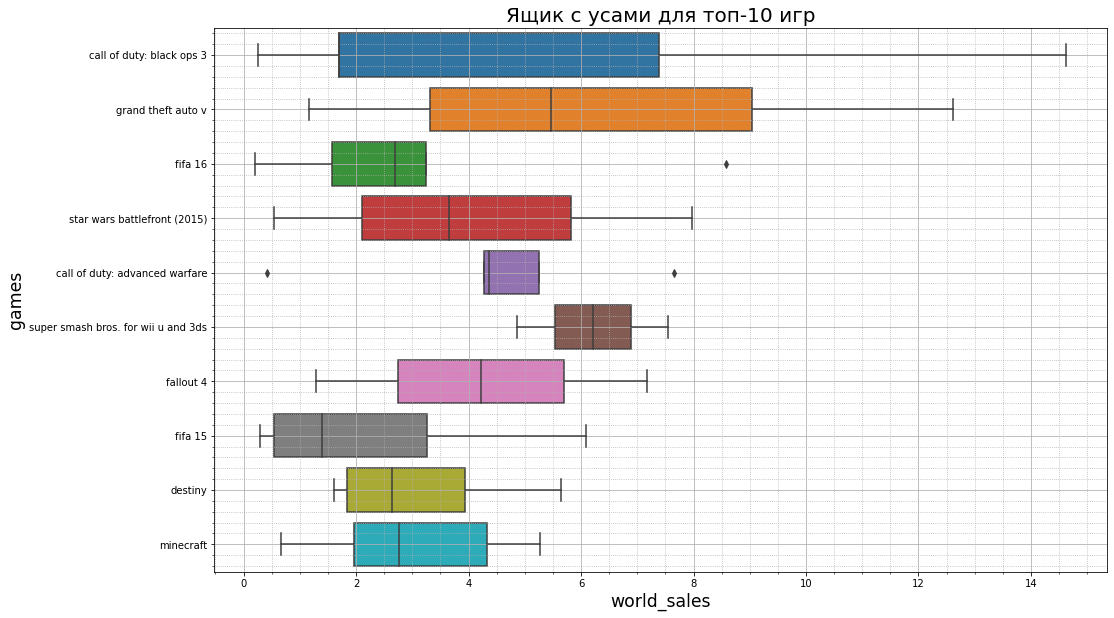

In [187]:
plt.figure(figsize=(16,10))
sns.boxplot(data=data_actual.query('name in @top_games_actual.index'), x='world_sales', y='name')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.title('Ящик с усами для топ-10 игр', fontsize=20)
plt.xlabel('world_sales', fontsize='xx-large')
plt.ylabel('games', fontsize='xx-large')
plt.show()

Итак, мы видим диаграммы размаха для десяти самых продающихся игр за последние пять лет. 
Теперь рассмотрим как продажи этих игр зависят от платформ.

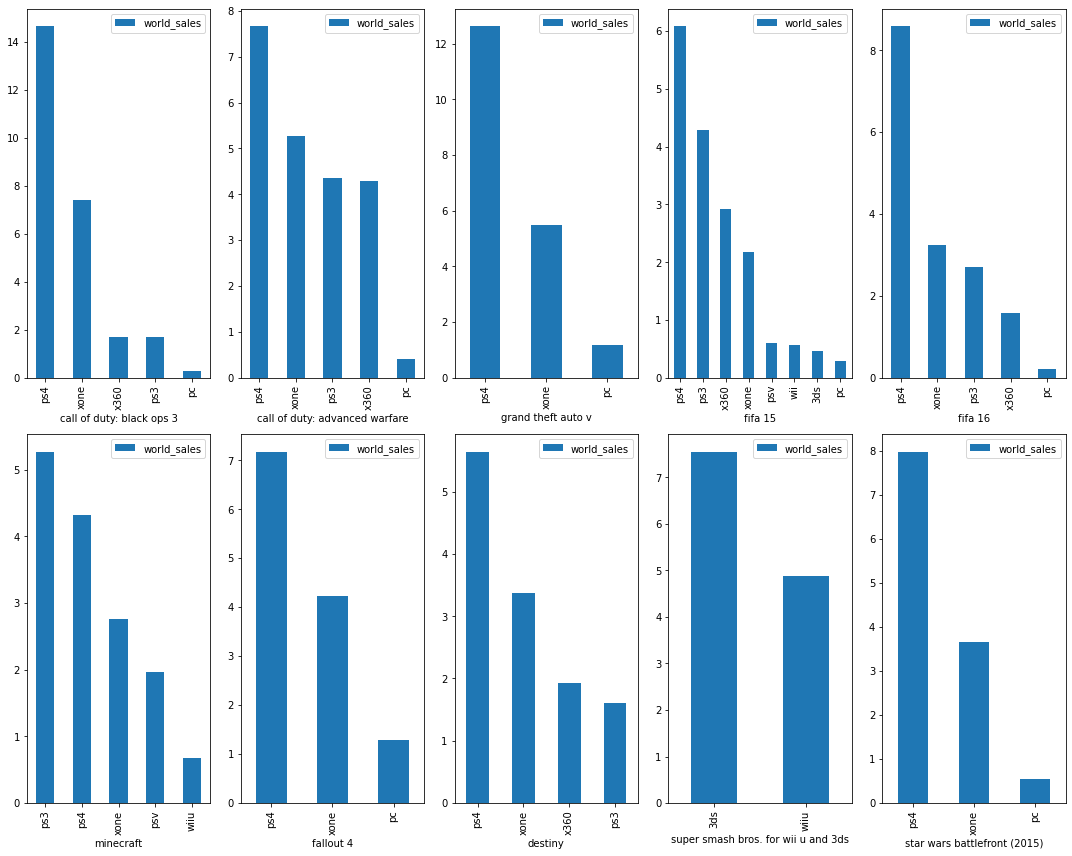

In [188]:
plt.subplots(2,5,figsize=(15,12))
i = 1
for game in top_games_actual.index:
    ax=plt.subplot(2,5,i)
    data_actual.query('name==@game').plot(kind='bar', x='platform', y='world_sales', ax=ax)
    ax.set_xlabel(game)
    i += 1
plt.tight_layout()

Из представленной визуализации можно сделать вывод о том, что самые популярные игры продаются на самых популярных платформах.

In [189]:
data_top_platforms = data_top_platforms.query('year_of_release >= 2011')
display(data_top_platforms)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
29,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.0,3.4,m,14.73
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,aikatsu stars! my special appeal,3ds,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16682,grisaia no kajitsu: la fruit de la grisaia,psp,2013,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16688,outdoors unleashed: africa 3d,3ds,2011,sports,0.01,0.00,0.00,0.00,NaN,NaN,t,0.01
16691,dynasty warriors: eiketsuden,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


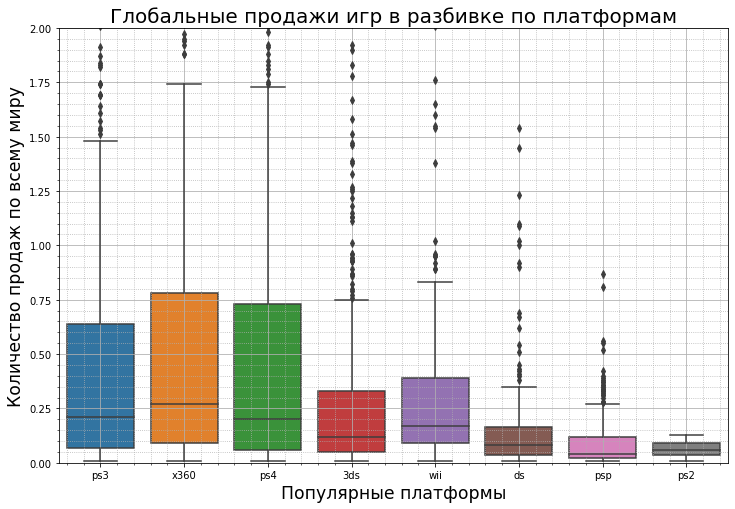

In [190]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data_top_platforms, x='platform', y='world_sales')
plt.ylim(0,2)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.title('Глобальные продажи игр в разбивке по платформам', fontsize=20)
plt.xlabel('Популярные платформы', fontsize='xx-large')
plt.ylabel('Количество продаж по всему миру', fontsize='xx-large')
plt.show()

По представленным диаграммам размаха можно сказать, что лидерами по средней выручке в мире являются платформы ps4, x360 и ps3. Самая маленькая средняя выручка у платформ ds, gba и psp.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [191]:
top_one = data_top_platforms[data_top_platforms['platform'] == "x360"]

In [192]:
corr = top_one[['world_sales',\
           'critic_score',\
           'user_score']].corr()
corr.style.background_gradient(cmap='coolwarm')

,world_sales,critic_score,user_score
world_sales,1.000000,0.391253,0.038918
critic_score,0.391253,1.000000,0.568386
user_score,0.038918,0.568386,1.000000


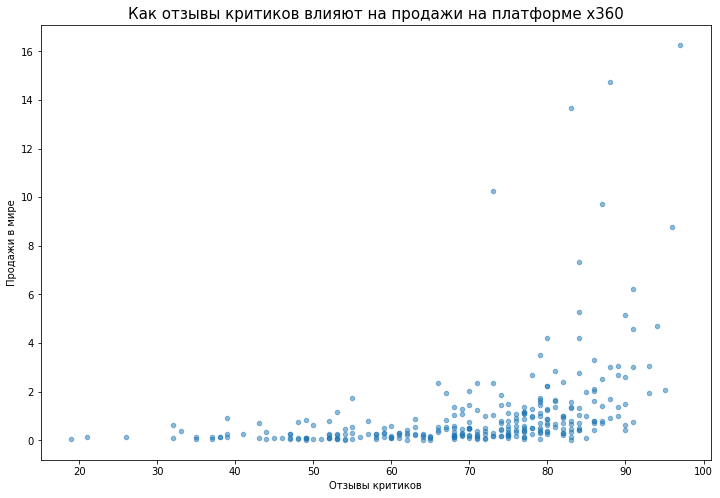

In [193]:
top_one.plot.scatter(figsize=(12,8),
    x='critic_score',
                 y='world_sales',
                 alpha=0.5)
plt.title('Как отзывы критиков влияют на продажи на платформе x360', fontsize=15)
plt.ylabel('Продажи в мире')
plt.xlabel('Отзывы критиков')
plt.show()

Оценки критиков имеют линейную средне-слабую связь со показателями продаж.

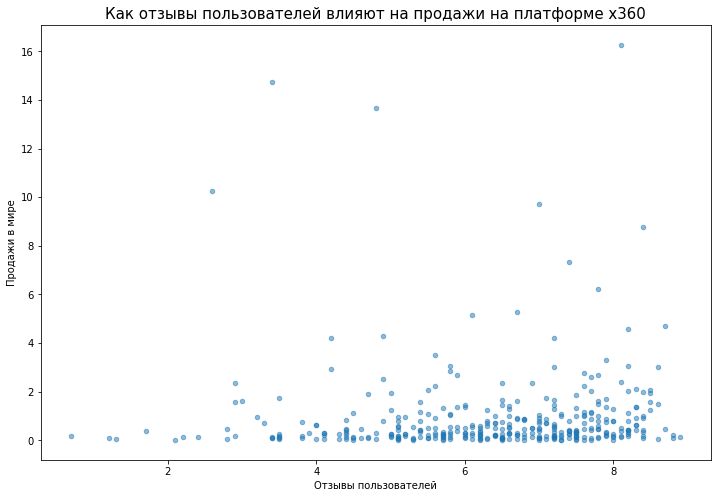

In [194]:
top_one.plot.scatter(figsize=(12,8),
    x='user_score',
                 y='world_sales',
                 alpha=0.5)
plt.title('Как отзывы пользователей влияют на продажи на платформе x360', fontsize=15)
plt.ylabel('Продажи в мире')
plt.xlabel('Отзывы пользователей')
plt.show()

Оценки пользователей имеют прямую слабую связь с показателями продаж.

Для платформы x360 коэффициент корреляции глобальных продаж с отзывами критиков и пользователей слабый. 

### Соотнесите выводы с продажами игр на других платформах

In [195]:
the_second = data_top_platforms[data_top_platforms['platform'] == "ps4"]

In [196]:
corr = the_second[['world_sales',\
           'critic_score',\
           'user_score']].corr()
corr.style.background_gradient(cmap='coolwarm')

,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


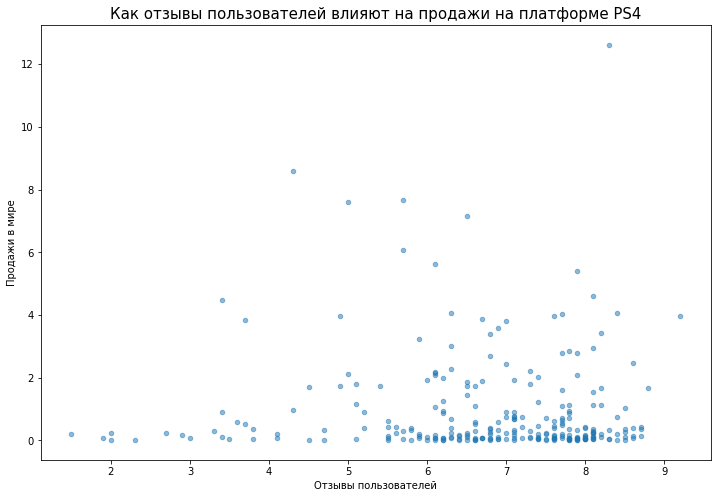

In [210]:
the_second.plot.scatter(figsize=(12,8),
    x='user_score',
                 y='world_sales',
                 alpha=0.5)
plt.title('Как отзывы пользователей влияют на продажи на платформе PS4', fontsize=15)
plt.ylabel('Продажи в мире')
plt.xlabel('Отзывы пользователей')
plt.show()

Нет прямой связи между продажами на платформе PS4 и отзывами пользователей.

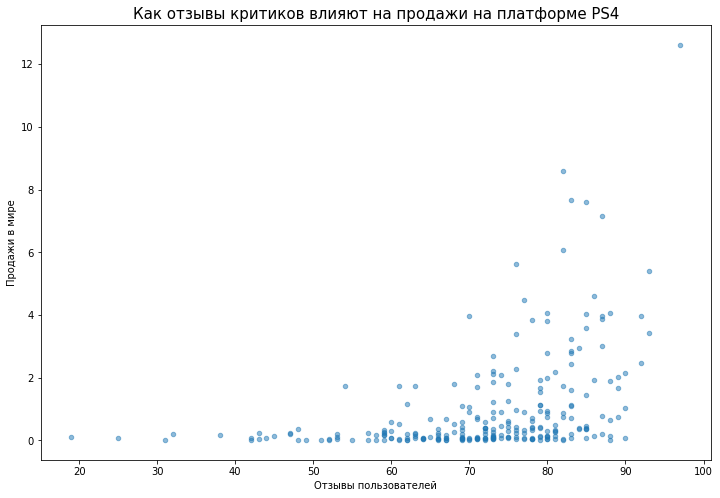

In [212]:
the_second.plot.scatter(figsize=(12,8),
    x='critic_score',
                 y='world_sales',
                 alpha=0.5)
plt.title('Как отзывы критиков влияют на продажи на платформе PS4', fontsize=15)
plt.ylabel('Продажи в мире')
plt.xlabel('Отзывы пользователей')
plt.show()

Между продажами на платформе PS4 прослеживается линейная средне-выраженная связь.

In [207]:
the_third = data_top_platforms[data_top_platforms['platform'] == 'ps3']

In [208]:
corr = the_third[['world_sales',\
           'critic_score',\
           'user_score']].corr()
corr.style.background_gradient(cmap='coolwarm')

,world_sales,critic_score,user_score
world_sales,1.000000,0.380111,0.014089
critic_score,0.380111,1.000000,0.563315
user_score,0.014089,0.563315,1.000000


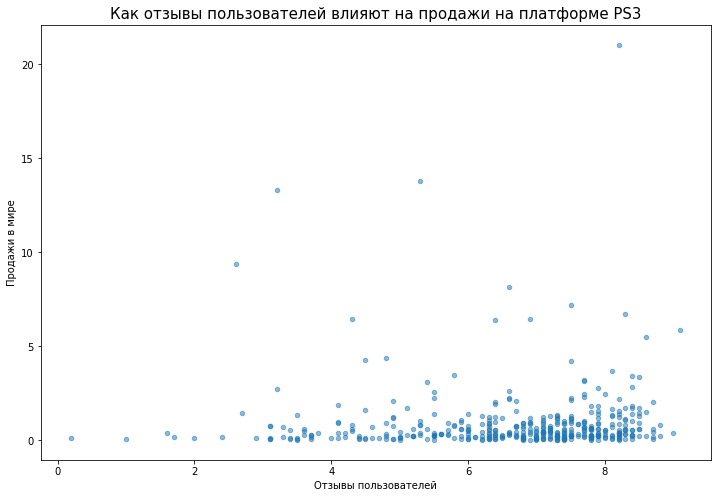

In [219]:
the_third.plot.scatter(figsize=(12,8),
    x='user_score',
                 y='world_sales',
                 alpha=0.5)
plt.title('Как отзывы пользователей влияют на продажи на платформе PS3', fontsize=15)
plt.ylabel('Продажи в мире')
plt.xlabel('Отзывы пользователей')
plt.show()

Для платформы PS3 линейная связь между продажами и отзывами пользователей выражена слабо.

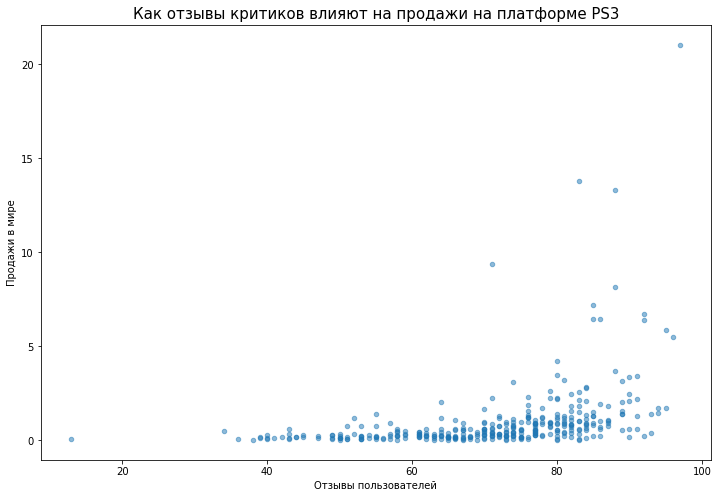

In [220]:
the_third.plot.scatter(figsize=(12,8),
    x='critic_score',
                 y='world_sales',
                 alpha=0.5)
plt.title('Как отзывы критиков влияют на продажи на платформе PS3', fontsize=15)
plt.ylabel('Продажи в мире')
plt.xlabel('Отзывы пользователей')
plt.show()

Отзывы критиков и продажи на платформе PS3 имеют средне-слабую линейную связь.

Была рассмотрена корреляция Пирсона для трех платформ. Во всех случаях было подтверждено наличие линейной средне-слабой корреляции между продажами и отзывами критиков. Между продажами и отзывами пользователей линейная связь выражена слабо.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

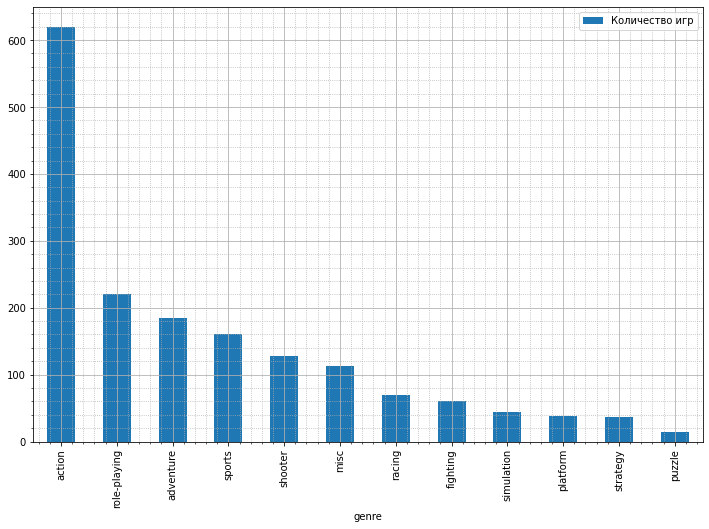

In [224]:
data_actual.groupby('genre')['name'].count().sort_values(ascending=False).plot(
    kind='bar', 
    label='Количество игр',
    legend=True, figsize=(12,8))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.show()

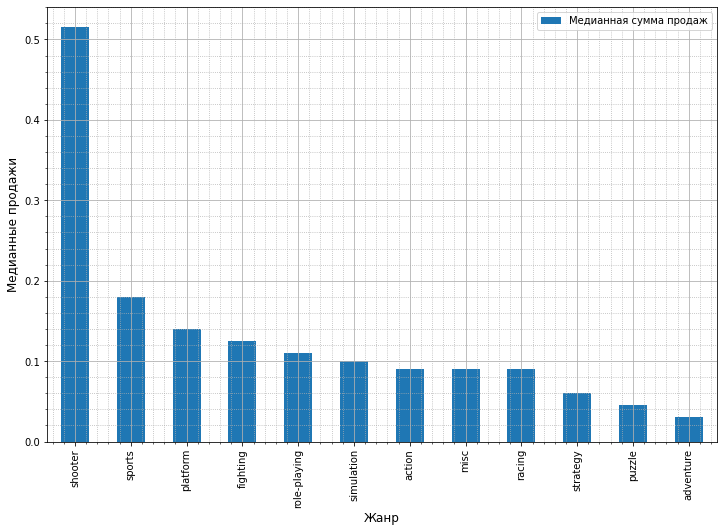

In [227]:
data_actual.groupby('genre')['world_sales'].median().sort_values(ascending=False).plot(
    kind='bar', 
    label='Медианная сумма продаж', 
    legend=True, figsize=(12,8))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xlabel('Жанр', fontsize='large')
plt.ylabel('Медианные продажи', fontsize='large')
plt.show()

Самые прибыльные жанры - shooter, sports, platform, fighting, role-paying. При этом в жанре action самое большое количество игр, на втором месте по количеству релизов role-playing games, а shooter занял пятое место по количеству релизов, однако для этого жанра самое высокое медианное значение продаж, из чего можно сделать вывод, что игры-стрелялки дольше остаются актуальными. 
В играх с самыми низкими продажами можно выделить стратегии, пазлы и приключения, у них небольшое количество релизов и невысокие продажи. Скорее всего это связано с тем, что такие игры ориентированы на специфическую аудиторию.

### Вывод

В ходе исследования был определен актуальный для период с 2011 по 2016 годы и срок жизненный цикл платформ, который составил в среднем 10 лет.
- Был отобран топ-10 платформ с наибольшими продажами в выбранном периоде и самые продаваемые игры.
- Была рассмотрена корреляция продажами и оценок критиков и пользователей.
- Были определены жанры с самым большим количеством релизов в выбранном периоде.
- Были определены жанры с самыми высокими и самыми низкими продажами.

## Составьте портрет пользователя каждого региона
Определить для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5). Описать различия в долях продаж.

In [70]:
top_na_platforms = pd.pivot_table(
    data_actual, 
    values='na_sales', 
    index='platform', 
    aggfunc='sum').sort_values(by='na_sales', ascending=False)

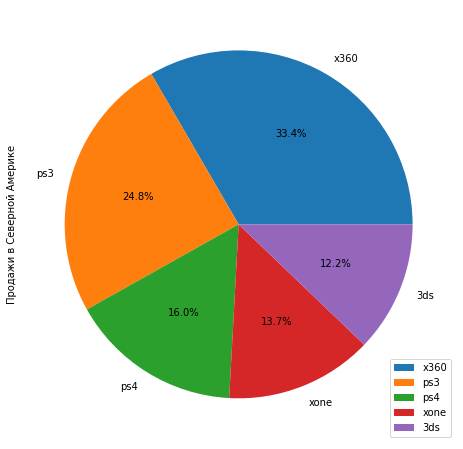

In [71]:
top_na_platforms.head(5).plot(
    kind='pie', 
    subplots=True,
    figsize=(12,8),
    ylabel='Продажи в Северной Америке',
    autopct='%1.1f%%')
plt.show()

In [72]:
top_eu_platforms = pd.pivot_table(
    data_actual, 
    values='eu_sales', 
    index='platform', 
    aggfunc='sum').sort_values(by='eu_sales', ascending=False)

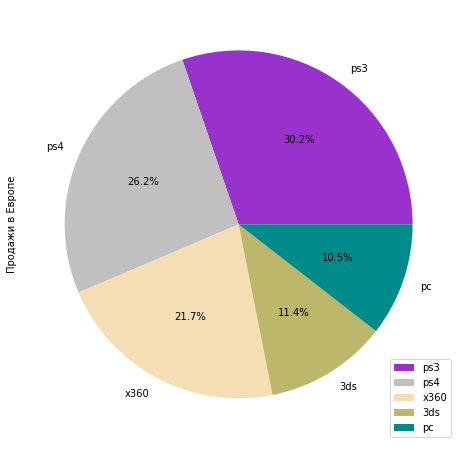

In [73]:
colors = ('darkorchid', 'silver', 'wheat', 'darkkhaki', 'darkcyan')
top_eu_platforms.head(5).plot(
    kind='pie', 
    subplots=True,
    figsize=(12,8),
    ylabel='Продажи в Европе',
    autopct='%1.1f%%',
colors=colors)
plt.show()

In [74]:
top_jp_platforms = pd.pivot_table(
    data_actual, 
    values='jp_sales', 
    index='platform', 
    aggfunc='sum').sort_values(by='jp_sales', ascending=False)

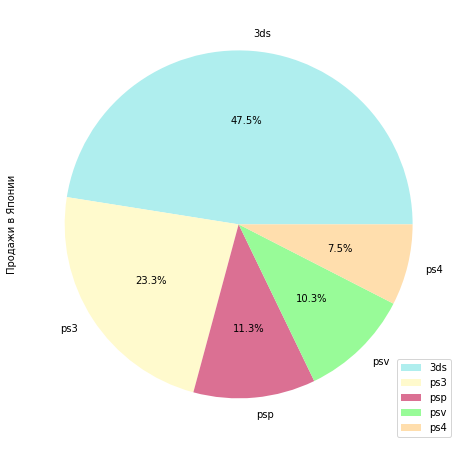

In [75]:
colors = ('paleturquoise', 'lemonchiffon', 'palevioletred', 'palegreen', 'navajowhite')
top_jp_platforms.head(5).plot(
    kind='pie', 
    subplots=True,
    figsize=(12,8),
    ylabel='Продажи в Японии',
    autopct='%1.1f%%',
colors=colors)
plt.show()

Самые популярные платформы в Северной Америке:

- х360 (33,4%), ps3 (24,8%), ps4 (16%), xone (13,7%), ds (12,2%)

Самые популярные платформы в Европе:

- ps3 (30,2%), ps4 (26,2%), x360 (21,7%), 3ds (11,4%), pc (10,5%)

Самые популярные платформы в Японии:

- 3ds (47,5%), ps3 (23,3%), psp (11,3%), psv (10,3%), ps4 (7,5%)

Проанализировав топ-5 платформ в трех регионах можно сказать, что топ-3 в Северной Америке и Европе состоит из одних и тех же платформ, с той разницей, что в Северной Америке больше продаж для платформы x360, в то время как в Европу для ps3.
Только в Европе пользователи предпочитают наравне с консолями pc.
В Японии картина сильно отличается, так как большую часть рынка занимает платформа 3ds, не вошедшая в топ по Северной Америке. При этом в Японии активно используются портативные девайсы на платформах psp и psv, а популярная в Европе и Северной Америке ps 4 занимает всего 7,5% от всех продаж в регионе.

### Самые популярные жанры (топ-5). Пояснить разницу.

In [234]:
top_na_genres = pd.pivot_table(
    data_actual, 
    values='na_sales', 
    index='genre', 
    aggfunc='sum').sort_values(by='na_sales', ascending=False)

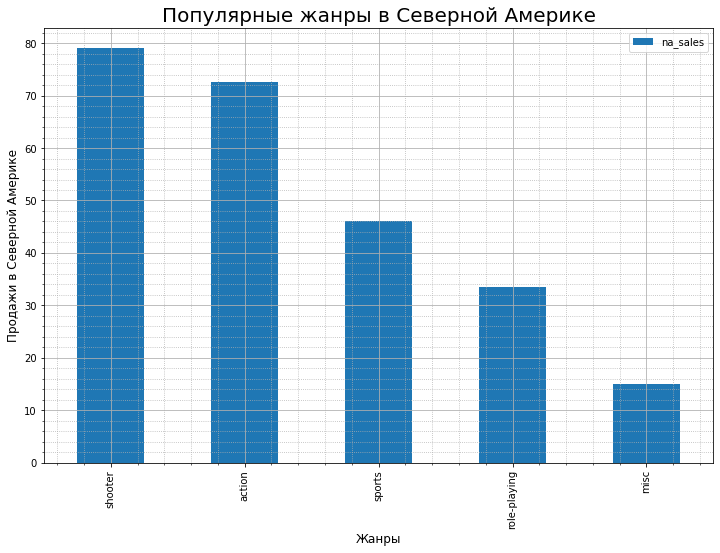

In [235]:
top_na_genres.head(5).plot(
    kind='bar', 
    subplots=True,
    figsize=(12,8))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.title('Популярные жанры в Северной Америке', fontsize=20)
plt.xlabel('Жанры', fontsize='large')
plt.ylabel('Продажи в Северной Америке', fontsize='large')
plt.show()

In [236]:
top_eu_genres = pd.pivot_table(
data_actual,
values = 'eu_sales',
index = 'genre',
aggfunc='sum').sort_values(by='eu_sales', ascending=False)

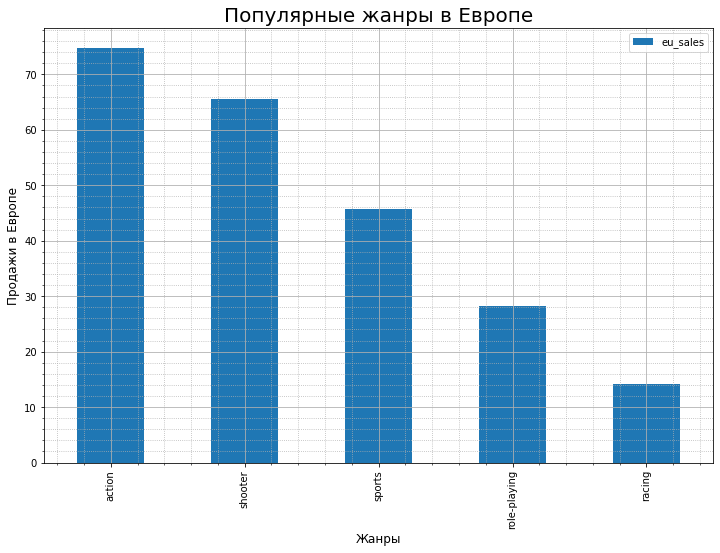

In [237]:
top_eu_genres.head(5).plot(
kind='bar',
subplots=True,
figsize=(12,8))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.title('Популярные жанры в Европе', fontsize=20)
plt.xlabel('Жанры', fontsize='large')
plt.ylabel('Продажи в Европе', fontsize='large')
plt.show()

In [238]:
top_jp_genres = pd.pivot_table(
data_actual,
values='jp_sales',
index='genre',
aggfunc='sum').sort_values(by='jp_sales', ascending=False)

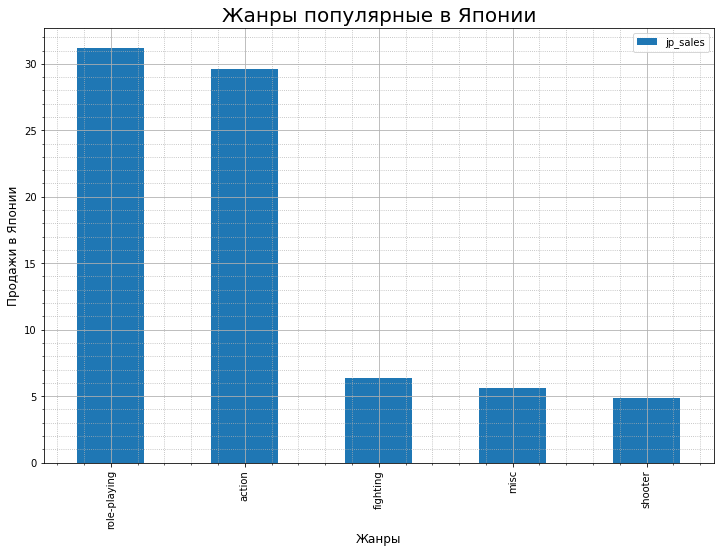

In [239]:
top_jp_genres.head(5).plot(
kind='bar',
subplots=True,
figsize=(12,8))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.title('Жанры популярные в Японии', fontsize=20)
plt.xlabel('Жанры', fontsize='large')
plt.ylabel('Продажи в Японии', fontsize='large')
plt.show()

Топ-5 жанров по регионам продаж имеет незначительную разницу между Европой и Северной Америкой и значительную разницу между двумя этими регионами и Японией, что можно соотнести с различными предпочтениями в платформах, которыми пользуются игроки.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [82]:
rating_na = pd.pivot_table(
data_actual,
values ='na_sales',
index ='rating',
aggfunc='sum').sort_values(by='na_sales', ascending=False)

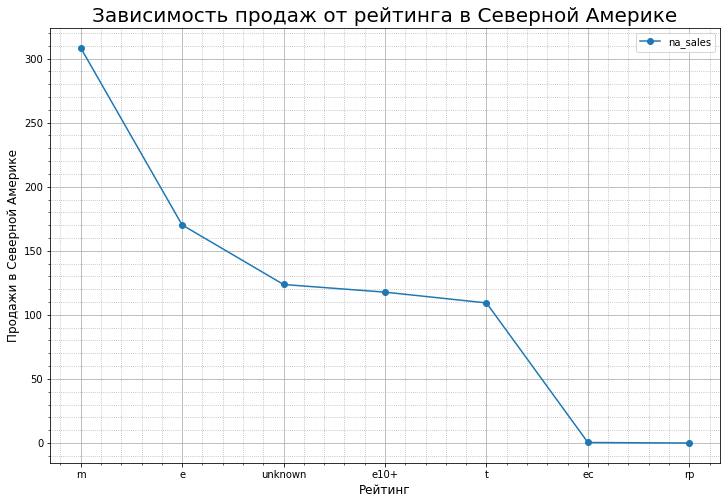

In [83]:
rating_na.plot(figsize=(12,8), style='-o')
plt.title('Зависимость продаж от рейтинга в Северной Америке', fontsize=20)
plt.xlabel('Рейтинг', fontsize='large')
plt.ylabel('Продажи в Северной Америке', fontsize='large')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.show()


In [84]:
rating_eu = pd.pivot_table(
data_actual,
values='eu_sales',
index='rating',
aggfunc='sum').sort_values(by='eu_sales', ascending=False)

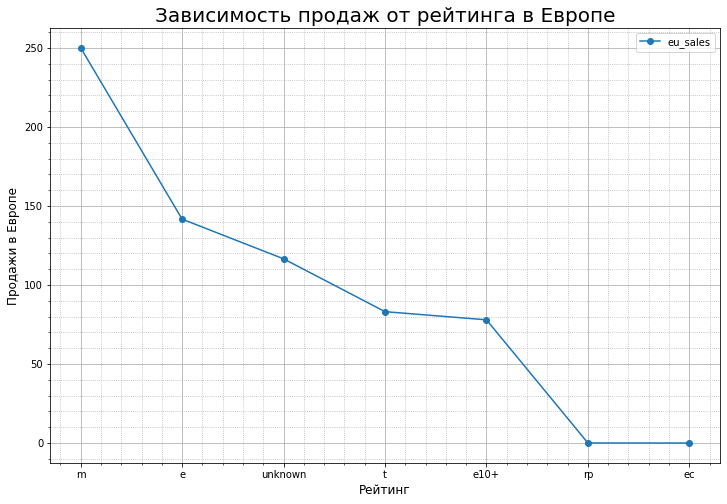

In [85]:
rating_eu.plot(figsize=(12,8), style='-o')
plt.title('Зависимость продаж от рейтинга в Европе', fontsize=20)
plt.xlabel('Рейтинг', fontsize='large')
plt.ylabel('Продажи в Европе', fontsize='large')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.show()

In [86]:
rating_jp = pd.pivot_table(
    data_actual,
    values='jp_sales',
    index='rating', 
    aggfunc='sum').sort_values(by='jp_sales', ascending=False)

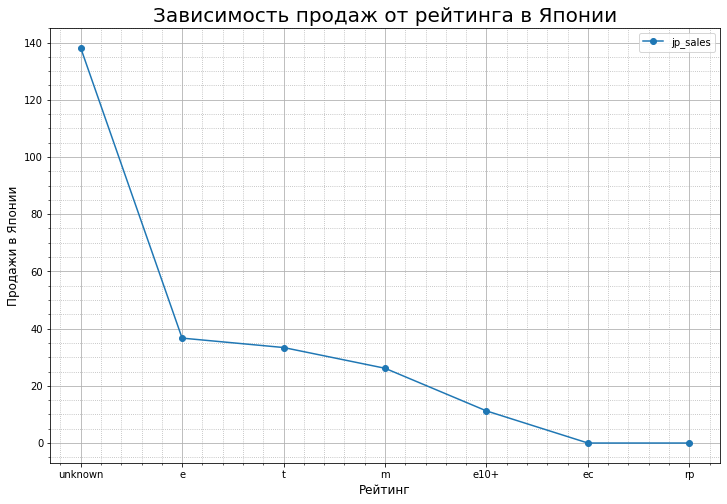

In [87]:
rating_jp.plot(figsize=(12,8), style='-o')
plt.title('Зависимость продаж от рейтинга в Японии', fontsize=20)
plt.xlabel('Рейтинг', fontsize='large')
plt.ylabel('Продажи в Японии', fontsize='large')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.show()

**Система ESRB**

- EC - Для детей младшего возраста
- E - Подходит для всех возрастных категорий
- E 10+ - Подходит для лиц старше 10 лет
- T - Подходит для лиц старше 10 лет.
- M	- Подходит для лиц старше 17 лет. 
- AO -	Подходит для взрослых старше 18 лет.
- RP - Категория ещё не присвоена.

Так же у нас есть значение-заглушка для пропущенных оценок *unknown*

Северная Америка: M, E, Unknown, T, e10+, ec, rp

Европа: M, E, Unknown, T, e10+, rp, ec

Япония: Unknown, e, t, m, e10+, ec, rp

Итак, с опорой на визуализацию, мы можем сказать, что существенного влияния на продажи непосредственно рейтинг не оказывает. 

К этому выводу мы приходим на том основании, что картины по Северной Америке и Европе практически не различаются.

Так же следует принять во внимание тот факт, что система ESRB разработана для США, Мексики и Канады, соответственно игры выпускаемые для различных платформ в других регионах могут не иметь такой классификации. 

В целом картина распределения возрастных рейтингов коррелирует с топом жанров и топом платформ для соответствующих регионов. 

Этим же объясняется тот факт, что в Японии на первом месте по продажам игры с рейтингом unknown, скорее всего играм, выходящим на японской платформе 3ds не присваевается категория ESRB.

По данным из Северной Америки и Европы можно сказать, что основные пользователи - это люди в возрасте от 10 лет до бесконечности. 

Больше всего продаж для этих регионов сделано в категории M - на этом основании можно предположить, что значительная часть пользователей старше 17 лет.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: *средние значения пользовательского рейтинга платформ Xbox One и PC равны.*

Н1: *средние значения пользовательского рейтинга платформ Xbox One и PC не равны.*

Пороговое значение alpha примем как равное 0.05

Для проверки гипотезы будет использован t-критерий Стьюдента, так как выборки независимы.

In [88]:
alpha = .05

data_xone = data_actual[(data_actual['platform'] == 'xone') & (data_actual['user_score'] > 0)]['user_score']
data_pc = data_actual[(data_actual['platform'] == 'pc') & (data_actual['user_score'] > 0)]['user_score']

print(data_xone.var(ddof=1))
print(data_pc.var(ddof=1))



1.9069968429360695
2.5962957995358837


Дисперсии выборок не равны, поэтому критерий equal_var=False.

In [89]:
results = st.ttest_ind(data_xone, data_pc, equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

H0: *средние значения пользовательского рейтинга жанров Action и Sports равны.*

Н1: *средние значения пользовательского рейтинга жанров Action и Sports не равны.*

Пороговое значение alpha примем как равное 0.05

Для проверки гипотезы будет использован t-критерий Стьюдента, так как выборки независимы.

In [90]:
alpha = .05

data_action = data_actual[(data_actual['genre'] == 'action') & (data_actual['user_score'] > 0)]['user_score']
data_sports = data_actual[(data_actual['genre'] == 'sports') & (data_actual['user_score'] > 0)]['user_score']

print(data_action.var(ddof=1))
print(data_sports.var(ddof=1))

1.8118770103036579
2.8825095404015264


In [91]:
results = st.ttest_ind(data_action, data_sports, equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 8.285648549432565e-19
Отвергаем нулевую гипотезу


Для проверки гипотезы был использован t-критерий Стьюдента, так как выборки независимы.

В результате проверки гипотез мы можем сделать вывод, что у нас нет оснований утверждать, что средние значения пользовательского рейтинга платформ Xbox One и PC значимо различаются, в то время как различие средних значений пользовательского рейтинга жанров Action и Sports можно считать статистически значимым.

## Вывод

С представленными данными была проведена предварительная обработка: 

- Выявление дубликатов, артефактов, аномальных значений и пропусков. 
- Данные были дополнены сведениями о продажах по всему миру. 
- Было проведено исследование данных на предмет их актуальности, по итогу для дальнейшей работы были отобраны наиболее актуальные данные. 
Так же были проведены исследования различных показателей: корреляция между продажами и отзывами критиков и пользователей, выбраны платформы с наибольшим числом продаж, так же самые продаваемые жанры. Изучено распределение продаж игр в зависимости от года релиза и платформы. Выявлена динамика продаж игр на разных платформах с 2014 по 2016 годы. Было установлено, что:
- Наличие отзывов критиков имеет средне-слабо выраженную линейную связь с количеством продаж.
- Наличие отзывов пользователей имеет слабо выраженную линейную связь с количеством продаж.

>Самые популярные платформы в Северной Америке:
х360 (33,4%), ps3 (24,8%), ps4 (16%), xone (13,7%), ds (12,2%).
Самые популярные жанры: shooter, action, sports.
Пользователи в Северной Америке чаще всего выбирают игры с рейтингом ESRB "M" или "E".

>Самые популярные платформы в Европе:
ps3 (30,2%), ps4 (26,2%), x360 (21,7%), 3ds (11,4%), pc (10,5%).
Самые популярные жанры в Европе: action, shooter, sports.
Пользователи в Европе чаще всего выбирают игры с рейтингом ESRB "M" или "E".

>Самые популярные платформы в Японии:
3ds (47,5%), ps3 (23,3%), psp (11,3%), psv (10,3%), ps4 (7,5%).
Самые популярные жанры в Японии: role-playing, action, fighting.
Пользователи из Японии могут предпочитать игры с рейтингами ESRB "E", "T", а так же не имеющие оценок ESRB или имеющие только рейтинг CERO.

Рекомендации для бизнеса: по данным за период 2014-2016 год можно ожидать высокие продажи на платформах ps4, xone. Для Северной Америки можно рекомендовать включить в рекламные кампании игры в жанрах shooter, action, sports с рейтингами "M" и "E" на платформах х360, ps3, ps4.

Для Европы рекомендованные платформы ps3, ps4, x360, а так же игры в жанрах shooter, action, sports с рейтингами "M" и "E".

Для Японии платформы 3ds, ps3, ps4 и игры в жанрах role-playing, action, fighting. Относительно рейтингов ESRB можно включить "E", "T", а так же игры не имеющие оценок ESRB или имеющие только рейтинг CERO.